<a href="https://colab.research.google.com/github/Betinsss/IQ-levels-analysis/blob/main/visualizationgeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/08_IQ Levels Analysis.csv')

In [ ]:
cols = ['rank','IQ', 'education_expenditure', 'avg_income','avg_temp']
# Choropleth by Country

for i in cols:

    if i == 'rank':
        fig = px.choropleth(data,
                            locations='country', locationmode='country names',
                            color = i,hover_name="country",
                            title = f'{i} Choropleth',
                            color_continuous_scale='Viridis_r')
        fig.show()
        fig.write_html(f"geo-{i}.html")
    else:
        fig = px.choropleth(data,
                            locations='country', locationmode='country names',
                            color = i,hover_name="country",
                            title = f'{i} Choropleth',
                            color_continuous_scale='Viridis_r')
        fig.show()
        fig.write_html(f"geo-{i}.html")

In [ ]:
# highest country according to Cost / Income

for i in cols:

    if i == 'rank':
        df_country = pd.DataFrame(data.groupby('country')[['country','rank']].sum().sort_values('rank', ascending=True).round(2).head(10))
        fig = px.bar(df_country, x = df_country.country, y = 'rank',
            title = 'highest country according to rank', template = 'seaborn', color = df_country.country, text = 'rank')
        fig.show()
    else:
        df_country = pd.DataFrame(data.groupby('country')[['country',i]].sum().sort_values(i, ascending=False).round(2).head(10))
        fig = px.bar(df_country, x = df_country.country, y = i,
            title = 'highest country according to ' + i, template = 'seaborn', color = df_country.country, text = i)
        fig.show()

In [ ]:
data = data.dropna()

In [ ]:

# Lowest county according to Cost / Income

for i in cols:

    if i == 'rank':

        char_bar = data.groupby(['country'])[['rank']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("rank"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['country'], y=top["rank"]))

        fig.update_layout(title="Lowest Country According to " + 'rank',
                          xaxis_title='Country',
                          yaxis_title= "rank",
                          plot_bgcolor='white',
                          paper_bgcolor='white',
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = data.groupby(['country'])[[i]].sum().reset_index()
        char_bar = char_bar.sort_values(by=(i), ascending=True)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['country'], y=top[i]))

        fig.update_layout(title="Lowest Country According to " + i,
                          xaxis_title= "Country",
                          yaxis_title= i,
                          plot_bgcolor='white',
                          paper_bgcolor='white',
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

<Axes: >

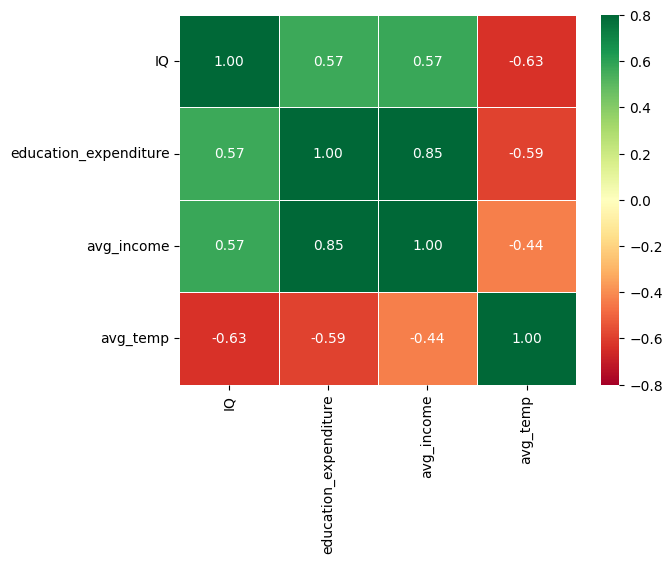

In [ ]:
# Correlation Matrix
data_corr = data.drop(["rank", "country"], axis=1)
correlation = data_corr.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6, cmap='RdYlGn', vmin=-0.8, vmax=0.8)
plot

Correlation between IQ and other features:

IQ vs education_expenditure: 0.57 - We see a positive correlation here, that is, the greater the education_expenditure, the greater the IQ.

IQ vs avg_income: 0.57 - We see a positive correlation here, that is, the greater the avg_income, the greater the IQ.

IQ vs avg_temp: - 0.63 - We see a negative correlation here, that is, the greater the avg_temp, the lower the IQ.